In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')

In [477]:
n_hours = np.array([10, 9, 2, 15, 10, 16, 11, 16], dtype=float)
risk_score = np.array([95, 80, 10, 50, 45, 98, 38, 93], dtype=float)

In [478]:
# n_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=float)
# risk_score = np.array([2, 3, 4, 5, 6, 7, 8, 9], dtype=float)

In [479]:
len(n_hours)

8

In [480]:
len(risk_score)

8

In [481]:
mu = []
std = []

In [482]:
x = n_hours
y = risk_score

In [483]:
def normalize(data):
    u_mean = np.mean(data)
    u_std = np.std(data, axis=0)
    
    mu.append(u_mean)
    std.append(u_std)
    
    data -= u_mean
    data /= u_std
    
    return data

[]

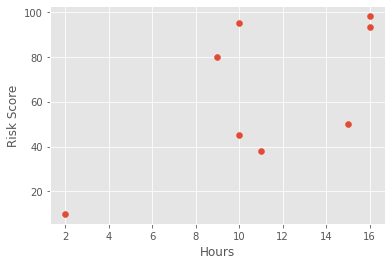

In [484]:
plt.xlabel('Hours')
plt.ylabel('Risk Score')
plt.scatter(x, y)
plt.plot()

In [485]:
x = normalize(x)

In [486]:
y = normalize(y)

In [487]:
x

array([-0.25735303, -0.48611127, -2.087419  ,  0.8864382 , -0.25735303,
        1.11519645, -0.02859478,  1.11519645])

[]

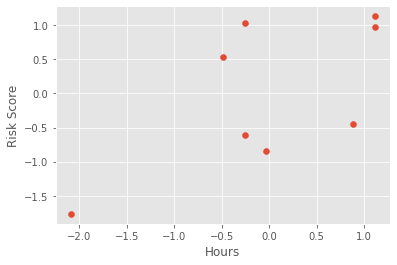

In [488]:
plt.xlabel('Hours')
plt.ylabel('Risk Score')
plt.scatter(x, y)
plt.plot()

In [489]:
def h(x, theta):
    return np.matmul(x, theta)

In [490]:
def cost_function(x, y, theta):
    return np.sqrt((h(x, theta)-y).T@(h(x, theta)-y)/(2*y.shape[0]))

In [491]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=25):
    m = x.shape[0]
    J_all = []
    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1/m)*(x.T@(h_x - y))
        theta = theta - (learning_rate)*cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all 

In [492]:
x = x.reshape(-1, 1)
x.shape

(8, 1)

In [493]:
y = y.reshape(-1, 1)
y.shape

(8, 1)

In [494]:
x_final = x

In [495]:
# x_final = np.hstack((np.ones((x.shape[0], 1)), x))

In [496]:
theta = np.zeros((x_final.shape[1], 1))

In [497]:
print('x_final.shape: ', x_final.shape)
print('x.shape: ', x.shape)
print('theta.shape: ', theta.shape)
print('y.shape: ', y.shape)

x_final.shape:  (8, 1)
x.shape:  (8, 1)
theta.shape:  (1, 1)
y.shape:  (8, 1)


In [498]:
lr = 0.1
epochs = 50

theta, J_all = gradient_descent(x_final, y, theta)

In [499]:
theta.shape

(1, 1)

In [500]:
x.shape

(8, 1)

In [501]:
J = cost(x_final, y, theta)

In [502]:
J

array([[0.43392949]])

In [503]:
theta

array([[0.61366897]])

In [504]:
def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.show()

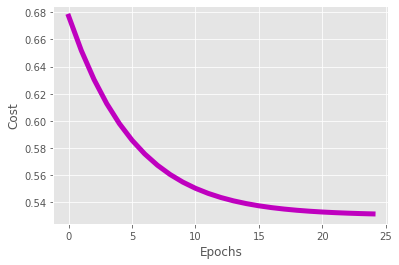

In [505]:
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

In [506]:
theta

array([[0.61366897]])

In [507]:
y_hat = x*theta

In [508]:
y_hat

array([[-0.15792957],
       [-0.2983114 ],
       [-1.28098427],
       [ 0.54397962],
       [-0.15792957],
       [ 0.68436146],
       [-0.01754773],
       [ 0.68436146]])

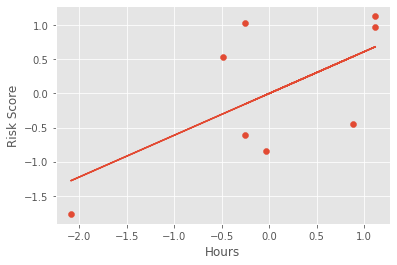

In [509]:
plt.xlabel('Hours')
plt.ylabel('Risk Score')
plt.scatter(x, y)
plt.plot(x, y_hat)